In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Internship/Neuronetix/telecom_churn_processed4modeling.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,1,0,1,0,0,0,0,1,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,12,0,2,56.95,1889.5,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,108.15,1
3,1,0,0,0,45,0,-1,1,1,0,1,1,0,0,12,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,1,70.70,151.65,1


In [4]:
# Convert 'TotalCharges' column to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values in 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

X = df.drop(["Churn"], axis=1)
y = df["Churn"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [6]:
models = {
    "LogisticRegression": LogisticRegression(),
    "LogisticRegressionCV": LogisticRegressionCV(),
    "SVC": SVC(probability=True),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "XGBRFClassifier": XGBRFClassifier(),
    "LGBMClassifier": LGBMClassifier(),
}

In [7]:
import time

cls_results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    loss = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cls_results.append({
        "Model": name,
        "Loss": f"{loss:.3f}",
        "Accuracy": f"{accuracy:.3f}",
        "AUC": f"{roc_auc:.3f}",
        "Time": f"{training_time:.2f} seconds"
    })
cls_results_df = pd.DataFrame(cls_results).sort_values(by="Accuracy", ascending=False)
cls_results_df

[LightGBM] [Info] Number of positive: 1501, number of negative: 4124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266844 -> initscore=-1.010692
[LightGBM] [Info] Start training from score -1.010692


,Model,Loss,Accuracy,AUC,Time
6,AdaBoostClassifier,0.200,0.800,0.843,0.32 seconds
1,LogisticRegressionCV,0.203,0.797,0.845,4.43 seconds
0,LogisticRegression,0.205,0.795,0.846,0.33 seconds
5,GradientBoostingClassifier,0.212,0.788,0.839,1.22 seconds
9,XGBRFClassifier,0.219,0.781,0.839,0.16 seconds
10,LGBMClassifier,0.220,0.780,0.829,0.13 seconds
4,RandomForestClassifier,0.223,0.777,0.815,1.83 seconds
8,XGBClassifier,0.224,0.776,0.817,0.13 seconds
7,KNeighborsClassifier,0.252,0.748,0.755,0.00 seconds
2,SVC,0.262,0.738,0.809,17.82 seconds


In [8]:
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3})")
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display_cm_roc(y_test, y_pred, y_prob):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # ROC Curve
    plot_roc_curve(y_test, y_prob)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax[0])
    ax[0].set_title('Confusion Matrix')

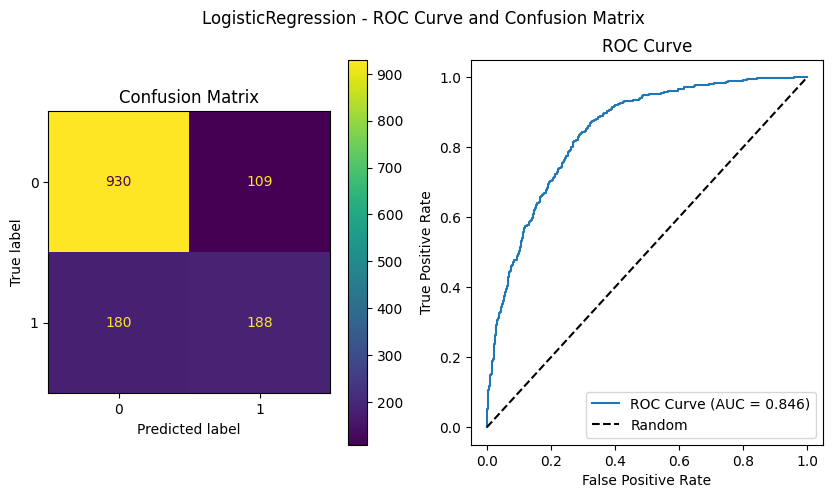

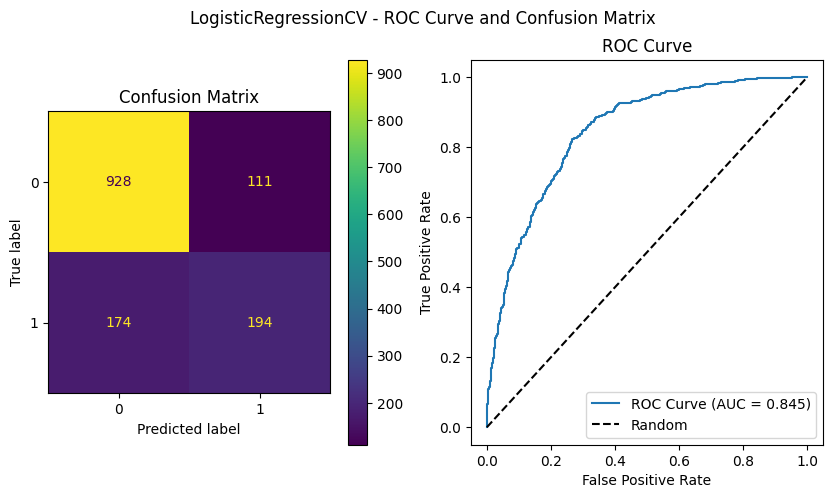

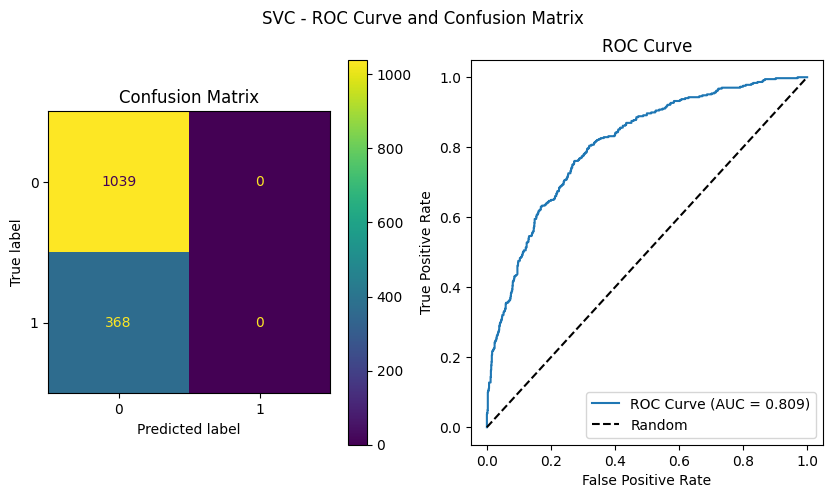

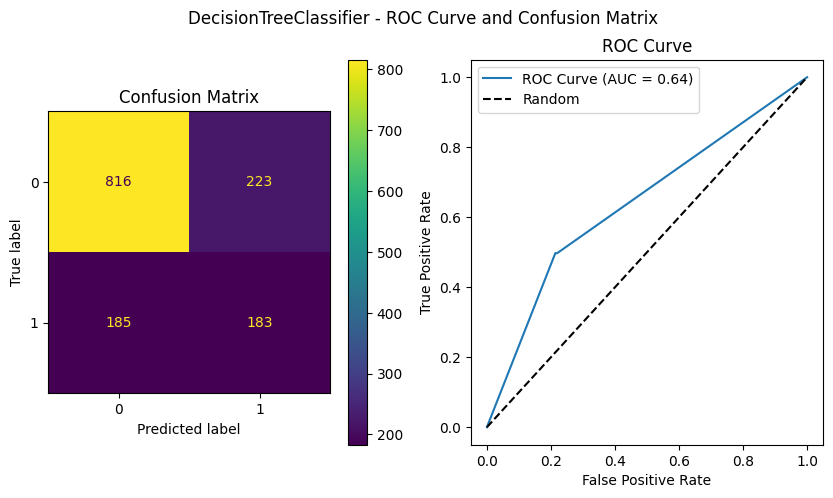

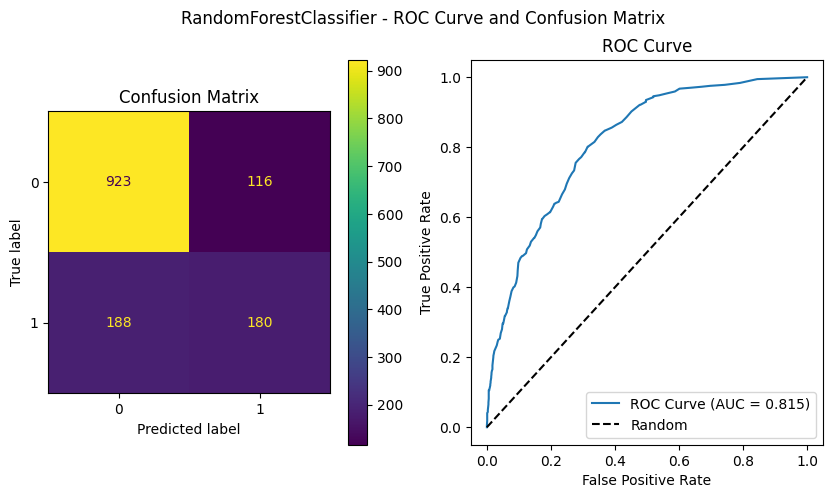

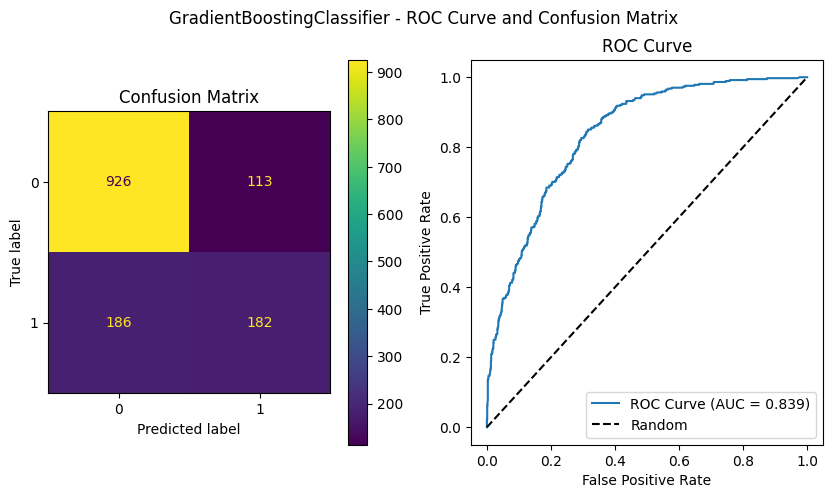

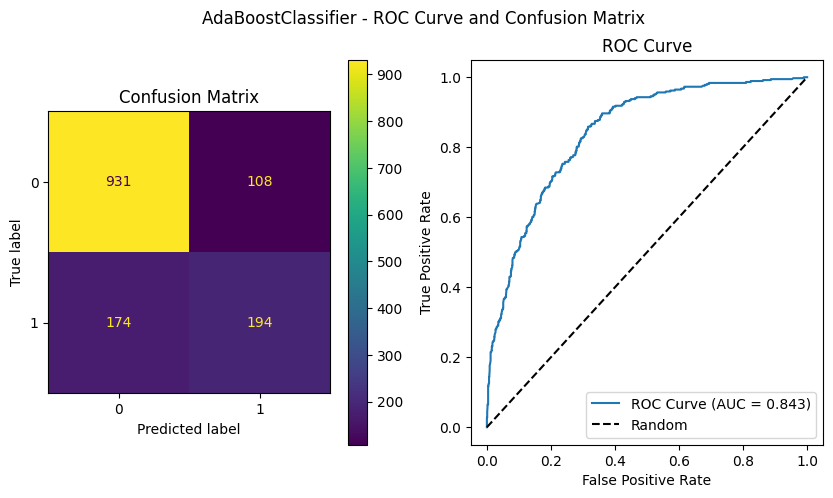

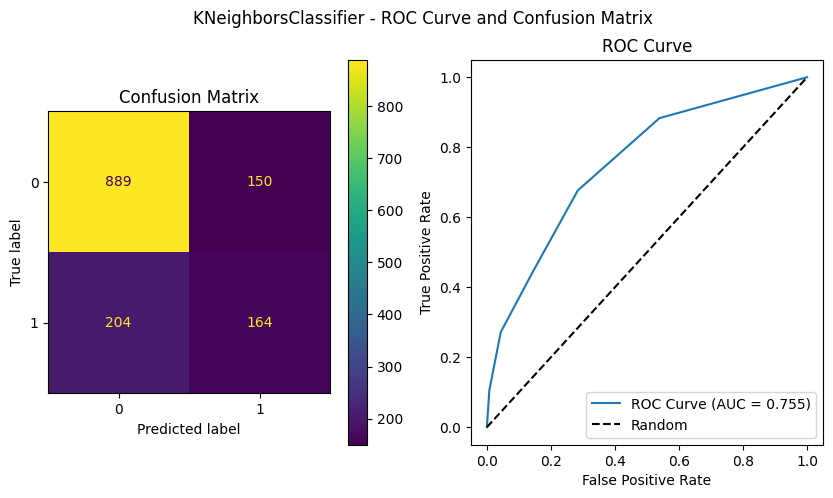

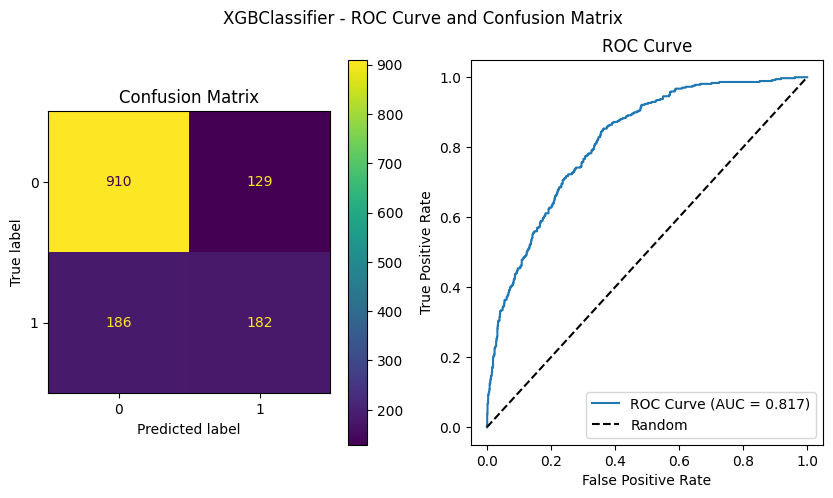

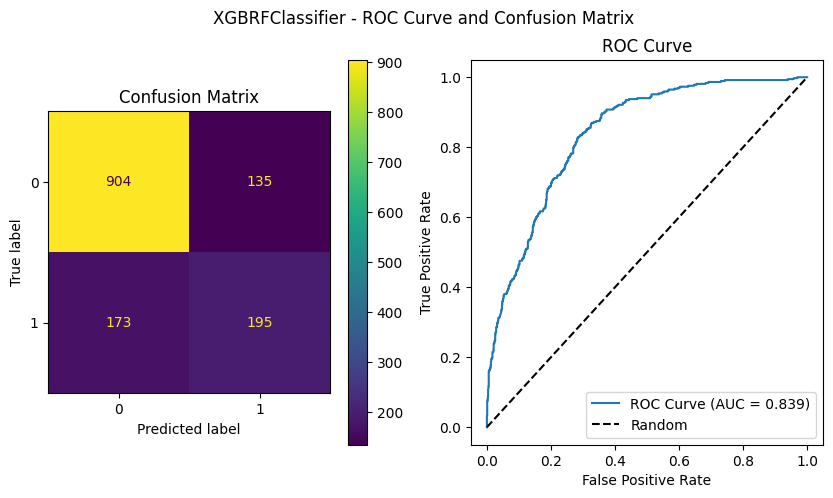

[LightGBM] [Info] Number of positive: 1501, number of negative: 4124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266844 -> initscore=-1.010692
[LightGBM] [Info] Start training from score -1.010692


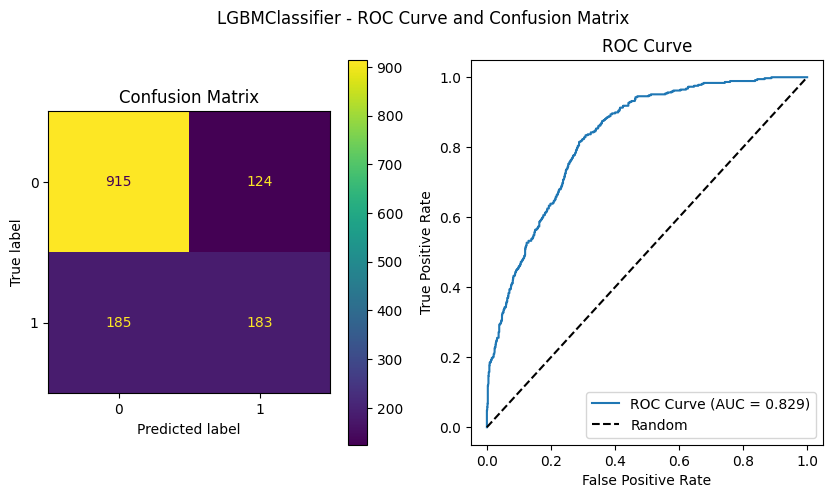

In [15]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    display_cm_roc(y_test, y_pred, y_pred_proba)
    plt.suptitle(f"{name} - ROC Curve and Confusion Matrix")
    plt.title(f"ROC Curve")
    plt.show()